<a href="https://colab.research.google.com/github/aniket-tiwari15/WATCHFUL-EYE/blob/main/WATCHFUL_EYE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is my Major Project 

first we mount google drive because we have data set in it.

In [ ]:
!unzip "/content/drive/MyDrive/Dataset/archive (3).zip"

unzip:  cannot find or open /content/drive/MyDrive/Dataset/archive (3).zip, /content/drive/MyDrive/Dataset/archive (3).zip.zip or /content/drive/MyDrive/Dataset/archive (3).zip.ZIP.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import os
import random

# Define the directory containing your dataset
dataset_dir = '/content/Train'

# Define the classes you want to remove photos from
classes_to_remove = ['Abuse', 'Arrest','Arson','Assault','Burglary','Explosion','Fighting','NormalVideos','RoadAccidents','Robbery','Shooting','Shoplifting','Stealing','Vandalism']

# Define the percentage of photos to remove from each class
percent_to_remove = 0.9

# Loop over each class directory
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_dir) and class_name in classes_to_remove:
        # Get a list of all photos in the class directory
        photos = os.listdir(class_dir)
        num_photos = len(photos)
        
        # Determine how many photos to remove based on the specified percentage
        num_to_remove = int(num_photos * percent_to_remove)
        
        # Randomly select photos to remove
        photos_to_remove = random.sample(photos, num_to_remove)
        
        # Delete the selected photos
        for photo in photos_to_remove:
            photo_path = os.path.join(class_dir, photo)
            os.remove(photo_path)

FileNotFoundError: ignored

In [ ]:
import os
import random

# Define the directory containing your dataset
dataset_dir = '/content/Test'

# Define the classes you want to remove photos from
classes_to_remove = ['Abuse', 'Arrest','Arson','Assault','Burglary','Explosion','Fighting','NormalVideos','RoadAccidents','Robbery','Shooting','Shoplifting','Stealing','Vandalism']

# Define the percentage of photos to remove from each class
percent_to_remove = 0.7

# Loop over each class directory
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_dir) and class_name in classes_to_remove:
        # Get a list of all photos in the class directory
        photos = os.listdir(class_dir)
        num_photos = len(photos)
        
        # Determine how many photos to remove based on the specified percentage
        num_to_remove = int(num_photos * percent_to_remove)
        
        # Randomly select photos to remove
        photos_to_remove = random.sample(photos, num_to_remove)
        
        # Delete the selected photos
        for photo in photos_to_remove:
            photo_path = os.path.join(class_dir, photo)
            os.remove(photo_path)

FileNotFoundError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

from tensorflow.keras.applications import DenseNet121
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout,MaxPooling2D , Conv2D,Flatten
from tensorflow.keras.models import Sequential

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report


from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_dir = "/content/Train"
test_dir = "/content/Test"

In [ ]:
SEED = 12
IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 64
EPOCHS = 1
LR =  0.00003

In [ ]:
crime_types=os.listdir(train_dir)
n=len(crime_types)
print("Number of crime categories : ",n)

Number of crime categories :  14


In [ ]:
crimes={}
train=test=0
for clss in crime_types:
    num=len(os.listdir(os.path.join(train_dir,clss)))
    train+=num
    test+=len(os.listdir(os.path.join(test_dir,clss)))
    
    crimes[clss]=num

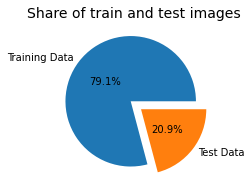

In [ ]:
plt.figure(figsize=(5, 3))
plt.pie(x=np.array([train,test]), autopct="%.1f%%", explode=[0.1, 0.1], labels=["Training Data", "Test Data"], pctdistance=0.5)
plt.title("Share of train and test images ", fontsize=14);

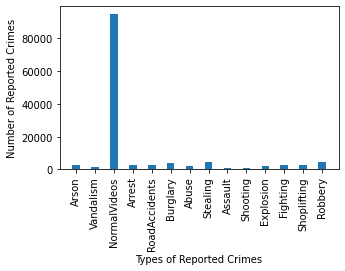

In [ ]:
plt.figure(figsize=(5,3))
plt.bar(list(crimes.keys()), list(crimes.values()), width=0.4,align="center" )
plt.xticks(rotation=90)

plt.xlabel("Types of Reported Crimes")
plt.ylabel("Number of Reported Crimes")
plt.show()

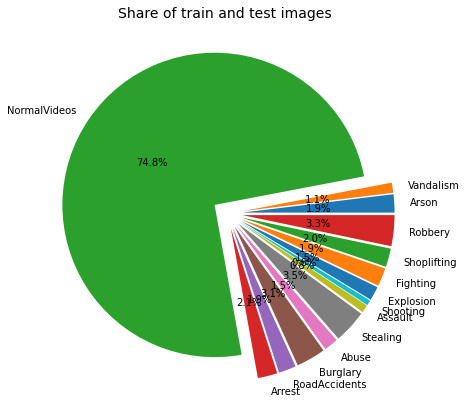

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(x=np.array(list(crimes.values())), autopct="%.1f%%", explode=[0.1]*n,labels=list(crimes.keys()), pctdistance=0.5)
plt.title("Share of train and test images ", fontsize=14);

In [ ]:
IMG_WIDTH=64
IMG_HEIGHT=64

IMG_SHAPE=(IMG_HEIGHT,IMG_WIDTH)
seed=69

INPUT_SHAPE=(IMG_HEIGHT,IMG_WIDTH,3)

In [ ]:
train_set=image_dataset_from_directory(
    train_dir,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SHAPE,
    shuffle=True,
    seed=seed,
    validation_split=0.2,
    subset="training",
)

Found 126641 files belonging to 14 classes.
Using 101313 files for training.


In [ ]:
val_set=image_dataset_from_directory(
    train_dir,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SHAPE,
    shuffle=True,
    seed=seed,
    validation_split=0.2,
    subset="validation",
)

Found 126641 files belonging to 14 classes.
Using 25328 files for validation.


In [ ]:
test_set=image_dataset_from_directory(
    test_dir,
    label_mode="categorical",
    class_names=None,
    batch_size=BATCH_SIZE,
    image_size=IMG_SHAPE,
    shuffle=False,
    seed=seed,
)

Found 33399 files belonging to 14 classes.


In [ ]:
def transfer_learning():
    base_model=DenseNet121(include_top=False,input_shape=INPUT_SHAPE,weights="imagenet")
    
    thr=149
    for layers in base_model.layers[:thr]:
        layers.trainable=False
    
    for layers in base_model.layers[thr:]:
        layers.trainable=True
    
    return base_model

In [ ]:
def create_model():
    model=Sequential()
    
    base_model=transfer_learning()
    model.add(base_model)
    
    model.add(GlobalAveragePooling2D())
    
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.2))
    
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.2))
    
    model.add(Dense(1024, activation="relu"))
    
    model.add(Dense(n,activation="softmax",name="classification"))
    
    model.summary()
    
    return model

In [ ]:
model=create_model()

model.compile(optimizer="adam", 
                loss='categorical_crossentropy',
                metrics = [tf.keras.metrics.AUC()])

29084464/29084464 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 2, 2, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0 

In [ ]:
history = model.fit(x = train_set,validation_data=val_set,epochs = EPOCHS)

NameError: ignored

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/major.h5')

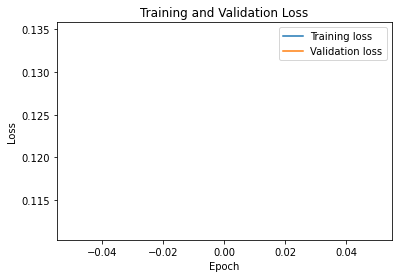

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_true =  np.array([])

for x, y in test_set:
  y_true = np.concatenate([y_true, np.argmax(y.numpy(), axis=-1)])

In [ ]:
model.evaluate(test_set)

522/522 [==============================] - 466s 892ms/step - loss: 2.9678 - auc: 0.7590


[2.9677860736846924, 0.7590005397796631]

In [ ]:
y_pred=model.predict(test_set)

522/522 [==============================] - 468s 897ms/step


In [ ]:
y_true

array([ 0.,  0.,  0., ..., 13., 13., 13.])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
# Convert the predicted probabilities to a one-hot encoded array of predicted labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute the accuracy, precision, recall, and AUC
accuracy = accuracy_score(y_true, y_pred_labels)
precision = precision_score(y_true, y_pred_labels, average='weighted')
recall = recall_score(y_true, y_pred_labels, average='weighted')
auc = roc_auc_score(y_true, y_pred, multi_class='ovr')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('AUC:', auc)

Accuracy: 0.40387436749603284
Precision: 0.5397070388042577
Recall: 0.4038743674960329
AUC: 0.6519937655556031


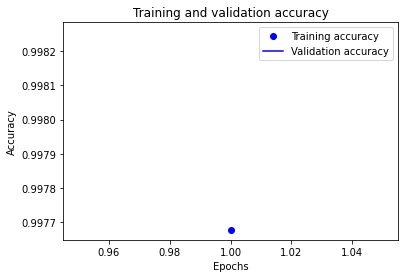

In [ ]:
# Extract training and validation accuracy from the history object
training_accuracy = history.history['auc']
validation_accuracy = history.history['val_auc']

# Plot the training and validation accuracy curves
epochs = range(1, len(training_accuracy) + 1)
plt.plot(epochs, training_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

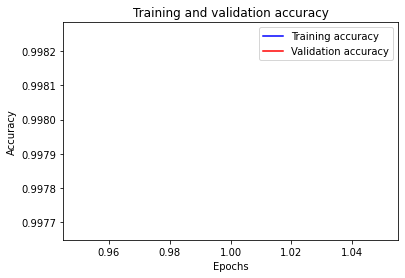

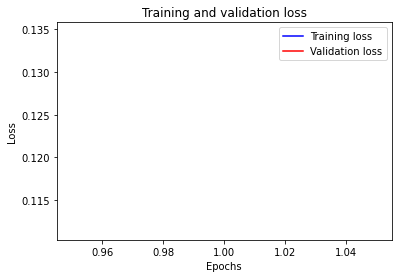

In [ ]:

# Extract training and validation accuracy and loss from the history object
training_accuracy = history.history['auc']
validation_accuracy = history.history['val_auc']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot the training and validation accuracy curves
epochs = range(1, len(training_accuracy) + 1)
plt.plot(epochs, training_accuracy, 'b-', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'r-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss curves
plt.plot(epochs, training_loss, 'b-', label='Training loss')
plt.plot(epochs, validation_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/drive/MyDrive/Colab Notebooks/major.h5')

In [ ]:
import cv2

# Load the image
img = cv2.imread('/content/Test/Abuse/Abuse028_x264_100.png')

# Check if the image was loaded successfully
if img is not None:
    print('Image loaded successfully')
else:
    print('Failed to load image')

Image loaded successfully


In [ ]:
from PIL import Image

# Load the image as a numpy array
img = Image.open('/content/Test/Abuse/Abuse030_x264_600.png')
img_array = np.array(img)

In [ ]:
import os
import numpy as np
import pandas as pd    


# Directory containing the new data that you want to classify
directory = '/content/Test'

# Load all the files from the directory
new_data = []
for file in os.listdir(directory):
    if file.endswith('.png'):
        file_path = os.path.join(directory, file)
        data = np.load(file_path, allow_pickle=True)
        new_data.append(data)

# Convert the list of arrays to a numpy array
new_data = np.array(new_data)

# Normalize the new data using the mean and standard deviation of the training data
new_data = (new_data - np.mean) /np.std

# Make predictions on the new data
predictions = model.predict(new_data)

# Print the predictions
print(predictions)


ValueError: ignored

In [ ]:
from PIL import Image

# Load the image as a numpy array
img = Image.open('/content/Test/Abuse/Abuse030_x264_600.png')
img_array = np.array(img)

In [ ]:
import keras
import keras.utils
from keras import utils as np_utils

In [ ]:
# Load the trained model
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/major.h5')

# Load the new data that you want to classify
new_data = np.load('/content/drive/MyDrive/Colab Notebooks/data.npy',allow_pickle=True)

# Make predictions on the new data
predictions = model.predict(new_data)

# Convert the predictions to class labels
class_labels = np.argmax(predictions, axis=1)

# Print the class labels
print(class_labels)







UnpicklingError: ignored

In [ ]:
# Preprocess the data
preprocessed_data = preprocess(new_data)

In [ ]:
# Use the trained model to predict the class labels
predictions = model.predict(preprocessed_data)

In [ ]:
# Apply a threshold to the model's output to classify the new data points
threshold = 0.5
anomalous_indices = np.where(predictions > threshold)[0]
normal_indices = np.where(predictions <= threshold)[0]

In [ ]:
# Print the results
print(f'Number of anomalous points: {len(anomalous_indices)}')
print(f'Number of normal points: {len(normal_indices)}')

ValueError: ignored